## WELCOME

In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from scipy.stats import skew

from sklearn.model_selection import cross_validate, cross_val_score
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 500) 
pd.set_option('display.max_rows', 500)
from sklearn.linear_model import LinearRegression
pd.options.display.float_format = '{:.3f}'.format
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv("final_scout_not_dummy.csv")

In [3]:
df.head()

,make_model,body_type,price,km,Type,Fuel,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,CO2_Emission
0,Audi A1,Sedans,15770,56013.000,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",7.000,3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,99.000
1,Audi A1,Sedans,14500,80000.000,Used,Benzine,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",7.000,2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,129.000
2,Audi A1,Sedans,14640,83450.000,Used,Diesel,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",7.000,3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,99.000
3,Audi A1,Sedans,14500,73000.000,Used,Diesel,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",6.000,3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,99.000
4,Audi A1,Sedans,16790,16200.000,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",7.000,3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,109.000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15909 entries, 0 to 15908
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15909 non-null  object 
 1   body_type            15909 non-null  object 
 2   price                15909 non-null  int64  
 3   km                   15909 non-null  float64
 4   Type                 15909 non-null  object 
 5   Fuel                 15909 non-null  object 
 6   Comfort_Convenience  15909 non-null  object 
 7   Entertainment_Media  15909 non-null  object 
 8   Extras               15909 non-null  object 
 9   Safety_Security      15909 non-null  object 
 10  Gears                15909 non-null  float64
 11  age                  15909 non-null  float64
 12  Previous_Owners      15909 non-null  float64
 13  hp_kW                15909 non-null  float64
 14  Inspection_new       15909 non-null  int64  
 15  Paint_Type           15909 non-null 

In [5]:
df.describe()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,CO2_Emission
count,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000
mean,18020.242,32092.437,5.937,1.390,1.043,88.498,0.247,1428.657,1337.675,117.783
std,7377.201,36982.839,0.705,1.121,0.339,26.667,0.431,275.852,199.672,18.023
min,4950.000,0.000,5.000,0.000,0.000,51.000,0.000,890.000,840.000,45.000
25%,12850.000,1913.000,5.000,0.000,1.000,66.000,0.000,1229.000,1165.000,104.000
50%,16900.000,20410.000,6.000,1.000,1.000,85.000,0.000,1461.000,1295.000,117.000
75%,21900.000,46900.000,6.000,2.000,1.000,103.000,0.000,1598.000,1472.000,129.000
max,74600.000,317000.000,8.000,3.000,4.000,294.000,1.000,2967.000,2471.000,253.000


## Feature Engineering

In [6]:
for col in df.select_dtypes('object'):
    print(f"{col:<20}:", df[col].nunique())

make_model          : 8
body_type           : 8
Type                : 5
Fuel                : 3
Comfort_Convenience : 6193
Entertainment_Media : 346
Extras              : 659
Safety_Security     : 4439
Paint_Type          : 3
Upholstery_type     : 2
Gearing_Type        : 3
Drive_chain         : 3


In [7]:
df.make_model.value_counts() 

Audi A3           3093
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1838
Renault Espace     991
Renault Duster      34
Name: make_model, dtype: int64

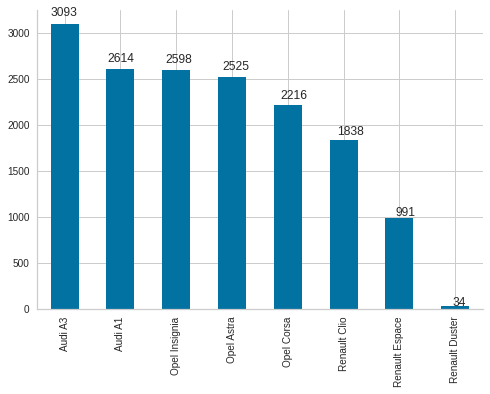

In [8]:
ax = df.make_model.value_counts().plot(kind ="bar")
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)
#ax.axis("off")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.03, p.get_height() * 1.03)) 

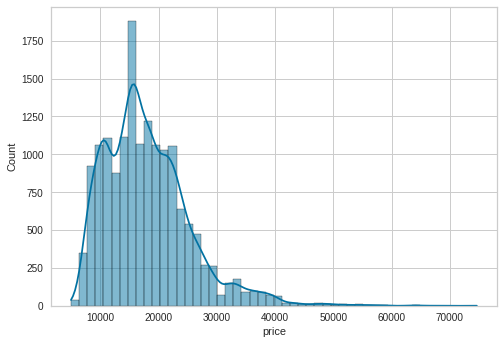

In [9]:
sns.histplot(df.price, bins=50, kde=True);

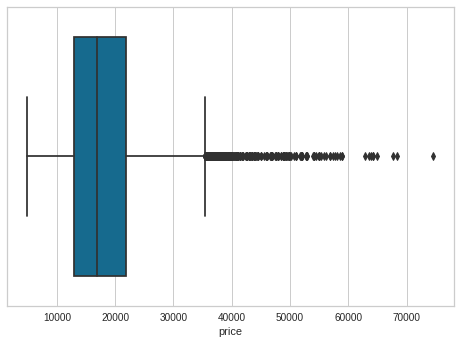

In [10]:
sns.boxplot(df.price) 

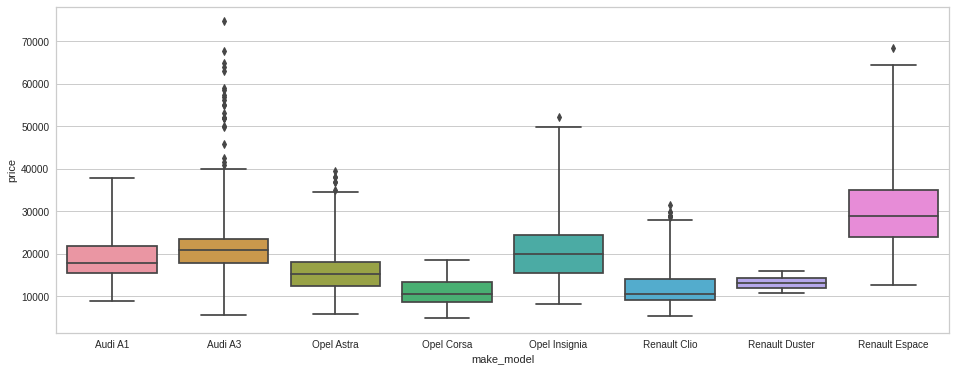

In [11]:
plt.figure(figsize=(16,6))
sns.boxplot(x="make_model", y="price", data=df, whis=3)
plt.show()

## Get dummies 

In [12]:
df = df.join(df["Comfort_Convenience"].str.get_dummies(sep = ",").add_prefix("cc_")) 
df = df.join(df["Entertainment_Media"].str.get_dummies(sep = ",").add_prefix("em_"))
df = df.join(df["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["Safety_Security"].str.get_dummies(sep = ",").add_prefix("ss_"))
df.drop(["Comfort_Convenience","Entertainment_Media","Extras","Safety_Security"], axis=1, inplace=True)
df = pd.get_dummies(df, drop_first =True)

## Data Pre-Processing

In [13]:
X= df.drop(columns="price")
y= df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## 1) Implement Linear Regression

In [14]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train) # overfitting var mı yok mu kıyaslamak için
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [15]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [16]:
train_val(lm, X_train, y_train, X_test, y_test)

,train,test
R2,0.890,0.890
mae,1704.693,1695.114
mse,6003486.622,5834182.497
rmse,2450.201,2415.405


### Cross-Validation

In [17]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)

In [18]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                   0.887
test_neg_mean_absolute_error          -1727.081
test_neg_mean_squared_error        -6197195.607
test_neg_root_mean_squared_error      -2486.897
dtype: float64

In [19]:
train_val(lm, X_train, y_train, X_test, y_test)

,train,test
R2,0.890,0.890
mae,1704.693,1695.114
mse,6003486.622,5834182.497
rmse,2450.201,2415.405


### Dropping observations from the dataset that worsen my predictions

In [20]:
df3 = df[~(df.price>35000)]

In [21]:
X = df3.drop(columns = "price")
y = df3.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [22]:
lm2 = LinearRegression()
lm2.fit(X_train,y_train)
train_val(lm2, X_train, y_train, X_test, y_test)

,train,test
R2,0.901,0.898
mae,1409.321,1419.488
mse,3744927.420,3815062.117
rmse,1935.181,1953.218


In [23]:
y_pred = lm2.predict(X_test)

lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## 2. Implement Ridge Regression

### Scaling

In [24]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Ridge

In [25]:
ridge_model = Ridge(random_state=42)
ridge_model.fit(X_train_scaled, y_train)
train_val(ridge_model, X_train_scaled, y_train, X_test_scaled, y_test) 

,train,test
R2,0.900,0.898
mae,1409.137,1419.395
mse,3746196.292,3813993.830
rmse,1935.509,1952.945


### Finding best alpha

In [26]:
alpha_space = np.linspace(0.01, 100, 100)
ridge_model = Ridge(random_state=42)

param_grid = {'alpha':alpha_space}

ridge_grid_model = GridSearchCV(estimator=ridge_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)
ridge_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [27]:
ridge_grid_model.best_estimator_

Ridge(alpha=1.02, random_state=42)

In [28]:
y_pred = ridge_grid_model.predict(X_test_scaled)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [29]:
ridge = Ridge(alpha=1.02, random_state=42).fit(X_train_scaled, y_train)

## 3. Implement Lasso Regression

In [30]:
lasso_model = Lasso(random_state=42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(random_state=42)

In [31]:
train_val(lasso_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.900,0.898
mae,1410.356,1418.036
mse,3757208.876,3809506.757
rmse,1938.352,1951.796


### Finding best alpha for Lasso

In [32]:
lasso_model = Lasso(random_state=42)

param_grid = {'alpha':alpha_space}

lasso_grid_model = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)
lasso_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [33]:
train_val(lasso_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.900,0.898
mae,1410.394,1418.047
mse,3757620.533,3809665.746
rmse,1938.458,1951.837


In [34]:
y_pred = lasso_grid_model.predict(X_test_scaled)
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## 4. Implement Elastic-Net

In [35]:
elastic_model = ElasticNet(random_state=42)
elastic_model.fit(X_train_scaled,y_train)
train_val(elastic_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.597,0.604
mae,3081.429,3028.555
mse,15153451.715,14790992.779
rmse,3892.743,3845.906


### Finding best alpha and l1_ratio for ElasticNet

In [36]:
elastic_model = ElasticNet(random_state=42)
param_grid = {'alpha':[1.02, 2,  3, 4, 5, 7, 10, 11],
              'l1_ratio':[.5, .7, .9, .95, .99, 1]}

elastic_grid_model = GridSearchCV(estimator=elastic_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)
elastic_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=ElasticNet(random_state=42), n_jobs=-1,
             param_grid={'alpha': [1.02, 2, 3, 4, 5, 7, 10, 11],
                         'l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error')

In [37]:
train_val(elastic_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.900,0.898
mae,1410.394,1418.047
mse,3757620.533,3809665.746
rmse,1938.458,1951.837


In [38]:
y_pred = elastic_grid_model.predict(X_test_scaled)
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## 5. Implement Decision Tree

In [39]:
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)
train_val(regressor, X_train, y_train, X_test, y_test)

,train,test
R2,1.000,0.921
mae,19.498,1011.847
mse,17031.335,2945531.347
rmse,130.504,1716.255


### Finding best hyperparmeters

In [40]:
parameters={"splitter":["best","random"],
            "max_depth" : [None,1,3,5],
           "min_samples_leaf":[1,2,3,4,5,6,7],
           "min_samples_split" : [2,3,5,6,7,8,9] }

In [41]:
tuning_model=GridSearchCV(regressor,param_grid=parameters,scoring='neg_mean_squared_error',cv=5,verbose=3)

In [42]:
tuning_model.fit(X_train,y_train)

Fitting 5 folds for each of 392 candidates, totalling 1960 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=-3246106.787 total time=   0.2s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=-3064913.340 total time=   0.2s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=-3046340.975 total time=   0.2s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=-3494007.104 total time=   0.2s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=-3475767.318 total time=   0.2s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=-3215536.885 total time=   0.2s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=-3600875.139 total time=   0.2s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_spl

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [None, 1, 3, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [43]:
tuning_model.best_params_

{'max_depth': None,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'splitter': 'best'}

In [44]:
tuned_hyper_model= DecisionTreeRegressor(max_depth=None,min_samples_leaf=7,min_samples_split=2,splitter='best')

In [45]:
tuned_hyper_model.fit(X_train,y_train)

DecisionTreeRegressor(min_samples_leaf=7)

In [46]:
train_val(tuned_hyper_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.969,0.937
mae,686.418,993.292
mse,1170761.404,2359030.283
rmse,1082.017,1535.914


In [47]:
y_pred = tuned_hyper_model.predict(X_test)
des_R2 = r2_score(y_test, y_pred)
des_mae = mean_absolute_error(y_test, y_pred)
des_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## 7. Implement Random Forest

In [48]:
regres = RandomForestRegressor(n_estimators = 10, random_state = 0)
regres.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [49]:
train_val(regres, X_train, y_train, X_test, y_test)

,train,test
R2,0.991,0.957
mae,342.925,812.060
mse,342665.826,1611482.077
rmse,585.377,1269.442


### Finding best hyperparmeters

In [50]:
parameters1={"n_estimators":[200,500],
            "max_depth" : [None,4,5,6,7],
           "min_samples_leaf":[2,3,4],
           "min_samples_split" : [3,5,8,9],
            "max_features":["auto",X.shape[1]/3,2]
            }

In [51]:
random_model=GridSearchCV(regres,param_grid=parameters1,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [52]:
random_model.fit(X_train,y_train)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits
[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=-1844522.887 total time=  15.8s
[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=-1871991.778 total time=  15.4s
[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=-1913849.328 total time=  15.2s
[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=500;, score=-1830409.760 total time=  38.6s
[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=500;, score=-1866793.130 total time=  38.6s
[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=500;, score=-1909306.887 total time=  38.6s
[CV 1/3] END max_depth=None, max_features=auto, min_samples_

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(n_estimators=10, random_state=0),
             param_grid={'max_depth': [None, 4, 5, 6, 7],
                         'max_features': ['auto', 43.333333333333336, 2],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [3, 5, 8, 9],
                         'n_estimators': [200, 500]},
             scoring='neg_mean_squared_error', verbose=3)

In [53]:
random_model.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 500}

In [54]:
random_hyper_model= RandomForestRegressor(n_estimators= 500,max_depth=None,min_samples_leaf=2,min_samples_split=3,max_features='auto')

In [55]:
random_hyper_model.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=2, min_samples_split=3, n_estimators=500)

In [56]:
train_val(random_hyper_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.989,0.960
mae,383.665,781.768
mse,403766.954,1486755.523
rmse,635.427,1219.326


In [57]:
y_pred = random_hyper_model.predict(X_test)
ran_R2 = r2_score(y_test, y_pred)
ran_mae = mean_absolute_error(y_test, y_pred)
ran_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 8. Artificial neural network

In [58]:
X_train1=scaler.fit_transform(X_train)
X_test1=scaler.transform(X_test)

In [59]:
seed=101

In [60]:
tf.random.set_seed(seed)
model_ann=Sequential()
model_ann.add(Dense(24,activation="relu", input_dim=X_train.shape[1]))
model_ann.add(Dense(24,activation="relu"))
model_ann.add(Dense(12,activation="relu"))
model_ann.add(Dense(6,activation="relu"))
model_ann.add(Dense(1))

model_ann.compile(optimizer="adam",loss="mse")

In [61]:
Early_stop=EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=25, restore_best_weights=True)


In [62]:
y.shape

(15417,)

In [63]:
y_test.shape,y_train.shape, X_test.shape, X_train.shape

((3084,), (12333,), (3084, 130), (12333, 130))

In [64]:
model_ann.fit(x=X_train1,y=y_train, validation_split=0.15, batch_size=128, epochs=1000, callbacks=[Early_stop])

Epoch 1/1000
82/82 [==============================] - 1s 4ms/step - loss: 337032544.0000 - val_loss: 332388192.0000
Epoch 2/1000
82/82 [==============================] - 0s 2ms/step - loss: 330936672.0000 - val_loss: 314885792.0000
Epoch 3/1000
82/82 [==============================] - 0s 2ms/step - loss: 276555104.0000 - val_loss: 207045584.0000
Epoch 4/1000
82/82 [==============================] - 0s 2ms/step - loss: 117352848.0000 - val_loss: 49576212.0000
Epoch 5/1000
82/82 [==============================] - 0s 2ms/step - loss: 41880280.0000 - val_loss: 41329452.0000
Epoch 6/1000
82/82 [==============================] - 0s 2ms/step - loss: 39268252.0000 - val_loss: 39137744.0000
Epoch 7/1000
82/82 [==============================] - 0s 2ms/step - loss: 37089504.0000 - val_loss: 36877160.0000
Epoch 8/1000
82/82 [==============================] - 0s 2ms/step - loss: 34864344.0000 - val_loss: 34559700.0000
Epoch 9/1000
82/82 [==============================] - 0s 2ms/step - loss: 3260333

In [65]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [66]:
train_val(model_ann,X_train1, y_train, X_test1, y_test)

386/386 [==============================] - 0s 1ms/step


,train,test
R2,0.954,0.945
mae,926.686,1006.132
mse,1720812.726,2068403.980
rmse,1311.798,1438.195


In [67]:

y_pred = model_ann.predict(X_test1)
ann_R2 = r2_score(y_test, y_pred)
ann_mae = mean_absolute_error(y_test, y_pred)
ann_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

97/97 [==============================] - 0s 1ms/step


## Visually Compare Models Performance In a Graph

In [68]:
scores = {"linear_m": {"r2_score": lm_R2 , 
 "mae": lm_mae, 
 "rmse": lm_rmse},

 "ridge_m": {"r2_score": rm_R2, 
 "mae": rm_mae,
 "rmse": rm_rmse},
    
 "lasso_m": {"r2_score": lasm_R2, 
 "mae": lasm_mae, 
 "rmse": lasm_rmse},

 "elastic_m": {"r2_score": em_R2, 
 "mae": em_mae, 
 "rmse": em_rmse},

 "Decission_m": {"r2_score": des_R2, 
 "mae": des_mae, 
 "rmse": des_rmse},

"Random_m": {"r2_score": ran_R2, 
 "mae": ran_mae, 
 "rmse": ran_rmse},

 "Ann_m": {"r2_score": ann_R2, 
 "mae": ann_mae, 
 "rmse": ann_rmse},
         
 #"final_m": {"r2_score": fm_R2, 
 #"mae": fm_mae , 
 #"rmse": fm_rmse}
 }
scores = pd.DataFrame(scores).T
scores

,r2_score,mae,rmse
linear_m,0.898,1419.488,1953.218
ridge_m,0.898,1419.394,1952.949
lasso_m,0.898,1418.047,1951.837
elastic_m,0.898,1418.047,1951.837
Decission_m,0.937,993.292,1535.914
Random_m,0.960,781.768,1219.326
Ann_m,0.945,1006.132,1438.195


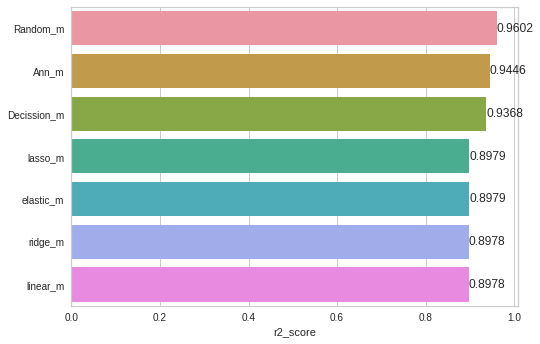

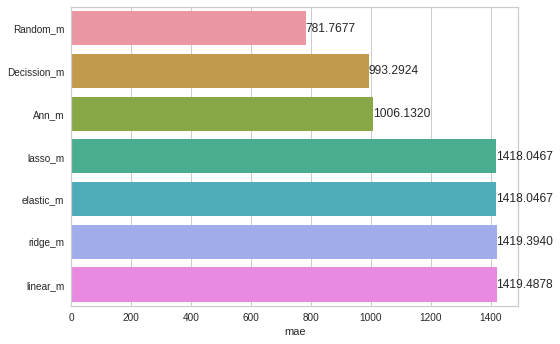

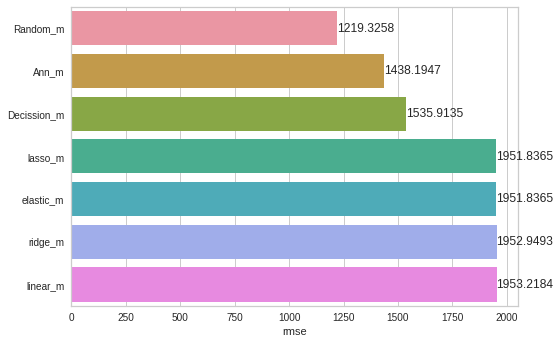

In [69]:
#metrics = scores.columns
for i, j in enumerate(scores):
    plt.figure(i)
    if j == "r2_score":
        ascending = False
    else:
        ascending = True
    compare = scores.sort_values(by=j, ascending=ascending)
    ax = sns.barplot(x = compare[j] , y= compare.index)
    for p in ax.patches:
            width = p.get_width()                        # get bar length
            ax.text(width,                               # set the text at 1 unit right of the bar
                    p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                    '{:.4f}'.format(width),             # set variable to display, 2 decimals
                    ha = 'left',                         # horizontal alignment
                    va = 'center') 